In [3]:
import sympy as sp
import numpy as np
import numpy.linalg as npla
sp.init_printing()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter, MultipleLocator

#from ipywidgets import interact
# For ducumentation on interact, see:
# https://stackoverflow.com/questions/68554501/plotting-a-two-variable-function-with-two-parameters-in-python

In [4]:
a, b, V = sp.symbols('a, b, V')

In [5]:
M = sp.Matrix([[V, a, a, b, 0, 0], 
               [a, V, a, 0, b, 0], 
               [a, a, V, 0, 0, b], 
               [b, 0, 0, 0, 0, 0],
               [0, b, 0, 0, 0, 0],
               [0, 0, b, 0, 0, 0]])

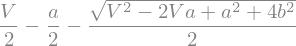

In [14]:
M_eigenvalues = M.eigenvals(multiple=False)
M_eigenvects = M.eigenvects()
M_eigenvects[0][0]

In [9]:
V_value_list = [0, 0.1, 0.2]
'''
M_eigenvalues_fixed_V_list = [[a.subs(V, V_value) for a in M_eigenvalues] for V_value in V_value_list]

eigenvalues_fixed_V_function_list = [[sp.lambdify((a, b), value_expression, modules='numpy') 
                                      for value_expression in M_eigenvalues_fixed_V] 
                                      for M_eigenvalues_fixed_V in M_eigenvalues_fixed_V_list]
'''
eigenvalues_function_list = [sp.lambdify((a, b, V), M_ev, modules='numpy') for M_ev in M_eigenvalues]

matrix_function_list = [sp.lambdify((a, b), M.subs(V, V_value), modules='numpy') for V_value in V_value_list]


In [10]:
dom = np.linspace(0, 5, 100)
#x, y = np.meshgrid(dom, dom)


result = np.array([[npla.eigvalsh(matrix_function_list[0](x, y)) for y in dom] for x in dom])

result_reshaped = np.transpose(result, [2, 0, 1])

In [17]:
"""
@interact(V=(0, 3))
def plot(V):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 10))
    surf = ax.plot_trisurf(x.flat, y.flat, eigenvalues_function_list[0](x, y, V).flat, cmap='coolwarm')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    ax.view_init(elev=30, azim=160)
    plt.show()
    return
"""

'\n@interact(V=(0, 3))\ndef plot(V):\n    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 10))\n    surf = ax.plot_trisurf(x.flat, y.flat, eigenvalues_function_list[0](x, y, V).flat, cmap=\'coolwarm\')\n    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)\n    ax.view_init(elev=30, azim=160)\n    plt.show()\n    return\n'